<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The project is accepted! Good luck on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but please add some conclusions. 

# Sprint 6 Project

## Initializing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
first_query = "/datasets/project_sql_result_01.csv"
second_query = "/datasets/project_sql_result_04.csv"

In [6]:
df_trips_num = pd.read_csv(first_query)
df_trips_average = pd.read_csv(second_query)

## Exploratory Data Analysis

In [7]:
display(df_trips_num.head())
display(df_trips_average.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [43]:
display(df_trips_num.isna().sum())
display(df_trips_average.isna().sum())

company_name    0
trips_amount    0
dtype: int64

dropoff_location_name    0
average_trips            0
dtype: int64

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

In [44]:
display(df_trips_average.nlargest(10, columns=["average_trips"]))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


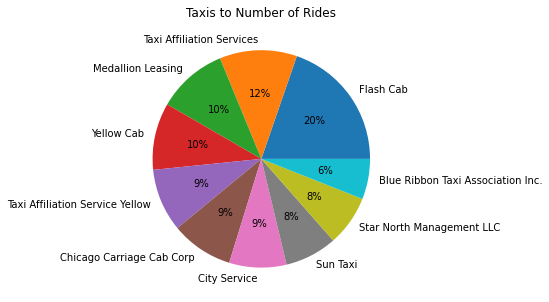

In [89]:
df_trips_num.nlargest(10, columns=['trips_amount']).set_index('company_name').plot(
    kind='pie', 
    y='trips_amount',
    autopct='%1.0f%%', 
    figsize=(10,5), 
    legend=False).set(label=df_trips_num.index)
plt.title('Taxis to Number of Rides')
plt.ylabel("")
plt.show() 

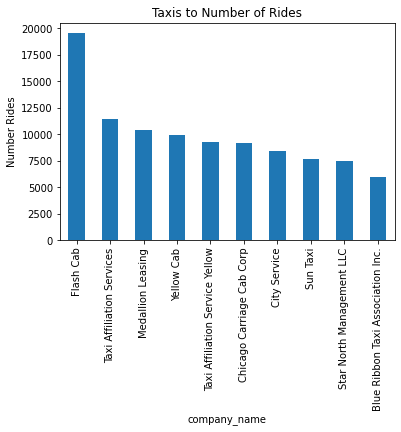

In [46]:
df_trips_num.nlargest(10, columns=['trips_amount']).set_index('company_name').plot(
    kind='bar', 
    y='trips_amount',
    legend=False).set(label=df_trips_cost.index)
plt.title('Taxis to Number of Rides')
plt.ylabel("Number Rides")
plt.show() 

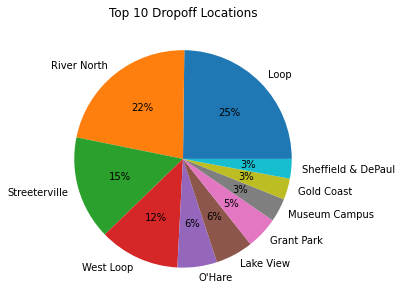

In [47]:
df_trips_average.nlargest(10, columns=['average_trips']).set_index('dropoff_location_name').plot(
    kind='pie', 
    y='average_trips',
    autopct='%1.0f%%', 
    figsize=(10,5), 
    legend=False).set(label=df_trips_average.index)
plt.title('Top 10 Dropoff Locations')
plt.ylabel("")
plt.show()

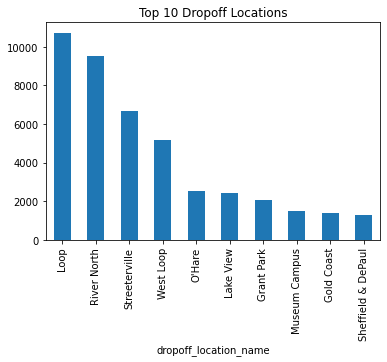

In [48]:
df_trips_average.nlargest(10, columns=['average_trips']).set_index('dropoff_location_name').plot(
    kind='bar', 
    y='average_trips',
    legend=False).set(label=df_trips_average.index)
plt.title('Top 10 Dropoff Locations')
plt.ylabel("")
plt.show()

Loop and River North were by far the most popular dropoff locations. The flash cab is a significantly more popular taxi for rides. All other companies were very comparable to one another.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified successfully. What are your conclusions though?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright!

</div>

## Hypothesis Testing

Null Hypothesis: "The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays."

Alternate Hypothesis: "The average duration of rides from the Loop to O'Hare International Airport does changes on rainy Saturdays."

<div class="alert alert-success">
<b>Reviewer's comment</b>

The null and alternative hypotheses were formulated correctly

</div>

In [59]:
df_rides = pd.read_csv("/datasets/project_sql_result_07.csv")

In [60]:
df_rides.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [69]:
df_rides.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [72]:
display(df_rides.isna().sum())

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

<AxesSubplot:title={'center':'Time in Loop'}>

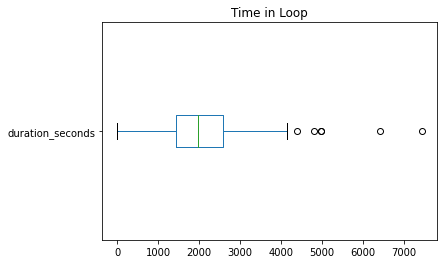

In [73]:
df_rides['duration_seconds'].plot(kind='box',
                                 title='Time in Loop',
                                 vert=False)

<AxesSubplot:title={'center':'Time in Loop'}, ylabel='Frequency'>

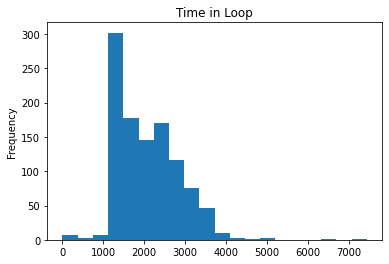

In [80]:
df_rides['duration_seconds'].plot(kind='hist',
                                 title='Time in Loop',
                                 bins=20)

In [83]:
df_rides["start_ts"] = pd.to_datetime(df_rides["start_ts"])

In [84]:
saturday_bad = df_rides[(df_rides["start_ts"].dt.weekday==5)&(df_rides["weather_conditions"]!="Good")]["duration_seconds"].values
saturday_good = df_rides[(df_rides["start_ts"].dt.weekday==5)&(df_rides["weather_conditions"]=="Good")]["duration_seconds"].values

In [88]:
alpha = 0.05
result = stats.ttest_ind(saturday_bad, saturday_good)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print("The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.")
print(f"Good weather, mean={saturday_good.mean()}")
print(f"Bad weather, mean={saturday_bad.mean()}")

pvalue: 6.517970327099473e-12
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
Good weather, mean=1999.6756756756756
Bad weather, mean=2427.2055555555557


<div class="alert alert-success">
<b>Reviewer's comment</b>

An appropriate test was used and the conclusion is consistent with test results

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Don't forget about the overall conclusion

</div>

Overall, the most popular option for a taxi is Flash Cab. All other taxi companies are likely very similar in quality of ride based on number of rides. Many people want to be dropped off in the neighborhoods of Loop and River North. However, if it is raining, the duration of rides on average will be shorter.

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

> However, it is less likely that people will take a taxi if it is raining.
    
That's not quite what we tested: our test was whether the *duration* of rides changes, which says nothing about the number of rides 

</div>